In [1]:

import sys
import os
import pandas as pd
import numpy as np

# move back from notebooks to root
os.chdir("..")

from src.data.manifests import generate_manifest
import src.utils as utils
from src.data.dataloader import mtlDataModule

COLLECTIONS = [
  "2022-09-23-10-17-46",
  "2022-09-23-10-39-51",
  "2022-09-23-11-03-28",
  "2022-09-23-11-09-28",
  "2022-10-19-10-44-31",
  "2022-10-19-11-07-11",
  "2022-10-19-11-15-59",
  "2022-10-19-11-20-39"
]

os.chdir(path="/home/bnbj/repos/multitask-mayhem/")

CONFIG = "/home/bnbj/repos/multitask-mayhem/configs/debug_foo.yaml"

class_lookup = utils.load_yaml("/home/bnbj/repos/multitask-mayhem/configs/class_lookup.yaml")

/home/bnbj/miniconda3/envs/multitask-mayhem/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# utils.logging_setup(CONFIG)

data_module = mtlDataModule(CONFIG)
data_module.prepare_data()
# data_module.setup(stage="fit")
# dataloader = data_module.val_dataloader()
# it = iter(dataloader)
# first = next(it)
# second = next(it)

100%|██████████| 8/8 [00:07<00:00,  1.01it/s]


In [3]:
# manifest = generate_manifest(
#     collections=COLLECTIONS,
#     data_root="data/interim",
#     create_mask=False
# )

In [4]:
len(data_module.manifests)

2081

In [10]:
def get_class_occurence(manifest:dict) -> list:

    class_count = [len(manifest), 0,0,0,0]

    for row in manifest:
        if "bbox" in row.keys():
            for bbox in row["bbox"]:
                class_count[bbox["class"]] += 1

    # for idx, class_type in enumerate(class_count):
        # print("Class {} has {} occurences".format(class_lookup["bbox_rev"][idx+1], class_type))

    return class_count

In [11]:
all = get_class_occurence(data_module.manifests)
train = get_class_occurence(data_module.train_split)
valid = get_class_occurence(data_module.valid_split)
test = get_class_occurence(data_module.test_manifest)

In [12]:
repr_df = pd.DataFrame(columns=["total imgs","person", "box", "agv", "forklift"])

repr_df.loc["all"] = all
repr_df.loc["train"] = train
repr_df.loc["valid"] = valid
repr_df.loc["test"] = test


repr_df

,total imgs,person,box,agv,forklift
all,2081,1401,3624,414,732
train,1665,1121,2899,322,603
valid,416,280,725,92,129
test,260,215,676,11,173


<AxesSubplot: title={'center': 'Class occurences in data splits'}>

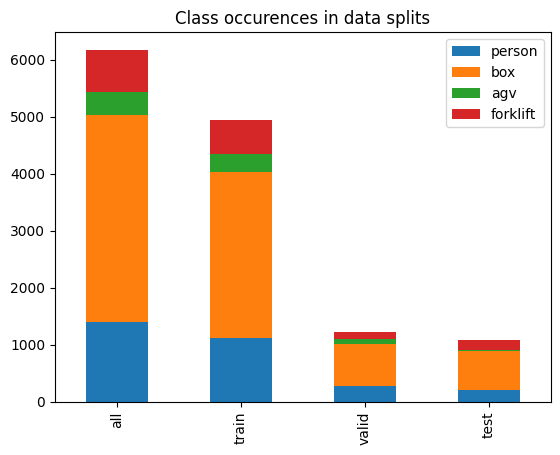

In [16]:
repr_df.plot.bar(y =["person", "box", "agv", "forklift"], title="Class occurences in data splits", stacked=True)

<AxesSubplot: title={'center': 'Data splits'}, ylabel='total imgs'>

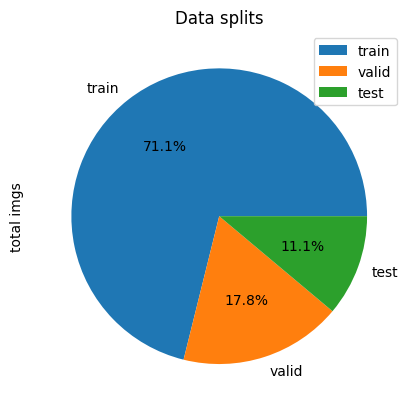

In [18]:
img_df = repr_df.loc[["train", "valid", "test"]].copy()
img_df.plot.pie(y = "total imgs", title="Data splits", autopct = '%1.1f%%')